In [36]:
## Import required libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

In [37]:
##Load the dataset

file_path = "Cleaned_CA_Fire_Perimeters_Cleaned.csv"
df = pd.read_csv(file_path)

In [38]:
## Convert date columns

df['poly_DateCurrent'] = pd.to_datetime(df['poly_DateCurrent'], errors='coerce')
df['CreationDate'] = pd.to_datetime(df['CreationDate'], errors='coerce')
df['EditDate'] = pd.to_datetime(df['EditDate'], errors='coerce')

In [39]:
## Create time features

df['Year'] = df['poly_DateCurrent'].dt.year
df['Month'] = df['poly_DateCurrent'].dt.month
df['Date'] = df['poly_DateCurrent'].dt.date

In [40]:
## Clean column names

df.columns = [col.strip().replace(" ", "_").lower() for col in df.columns]

# ========== 🔥 2D Visualizations ==========

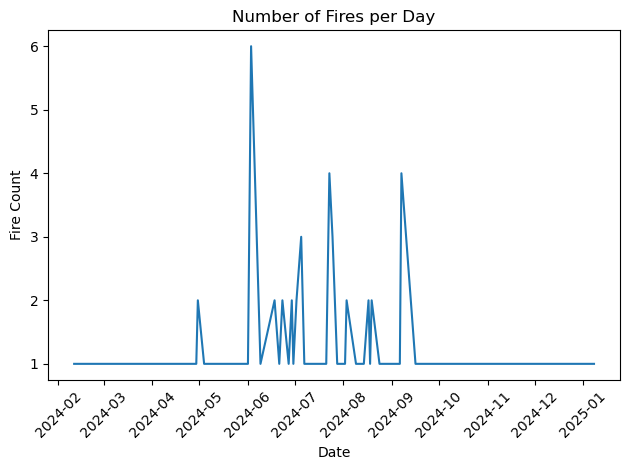

In [41]:
## Fire Count Over Time

fires_per_day = df.groupby('date').size()
fires_per_day.plot(title='Number of Fires per Day', ylabel='Fire Count', xlabel='Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

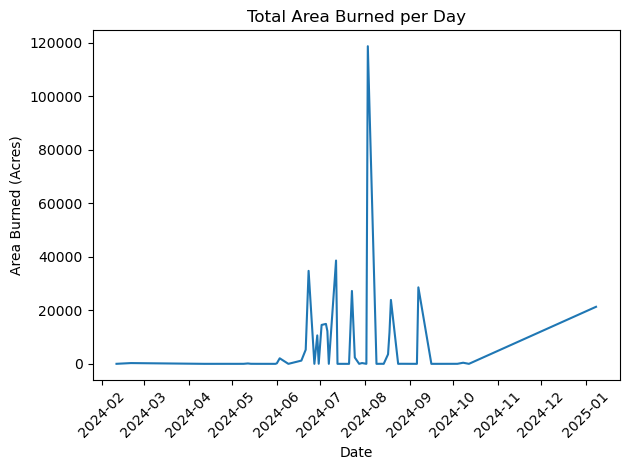

In [42]:
## Total Area Burned

area_per_day = df.groupby('date')['area_acres'].sum()
area_per_day.plot(title='Total Area Burned per Day', ylabel='Area Burned (Acres)', xlabel='Date')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

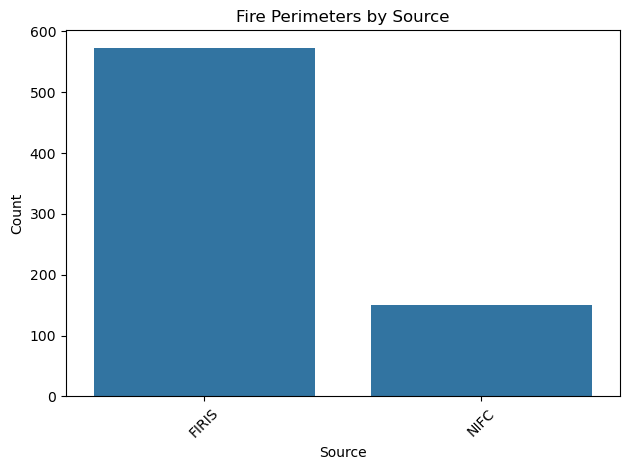

In [43]:
## Source-wise Distribution

sns.countplot(data=df, x='source', order=df['source'].value_counts().index)
plt.title('Fire Perimeters by Source')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


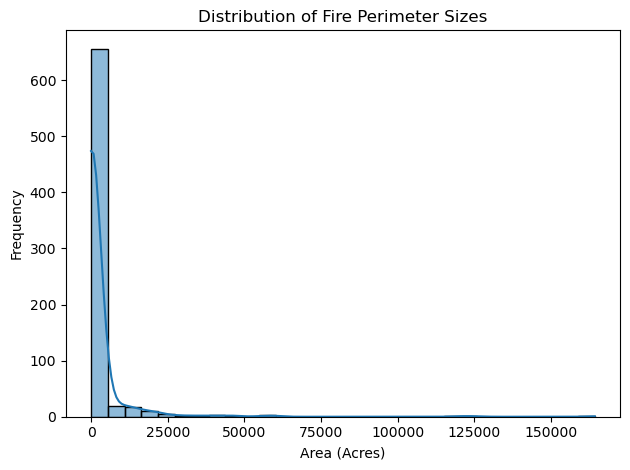

In [44]:
## Area Burned Distribution

sns.histplot(df['area_acres'], bins=30, kde=True)
plt.title('Distribution of Fire Perimeter Sizes')
plt.xlabel('Area (Acres)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# ========== 🗺️ 3D Map (Mock Coordinates) ==========

In [45]:
## Add mock coordinates (you MUST replace these with real lat/lon values)

np.random.seed(42)
df['latitude'] = np.random.uniform(32.5, 42.0, len(df))  # Latitude range in CA
df['longitude'] = np.random.uniform(-124.5, -114.0, len(df))  # Longitude range in CA

In [46]:
## 3D Map using Plotly

fig = px.scatter_3d(
    df,
    x='longitude',
    y='latitude',
    z='area_acres',
    color='source',
    hover_name='incident_name',
    size='area_acres',
    title='3D Map of California Wildfires (Mock Coordinates)',
    labels={'longitude': 'Longitude', 'latitude': 'Latitude', 'area_acres': 'Area (Acres)'}
)
fig.show()

In [47]:
## ========== 🌍 3D Globe (scatter_geo) ==========
fig_geo = px.scatter_geo(
    df,
    lat='latitude',
    lon='longitude',
    color='source',
    size='area_acres',
    hover_name='incident_name',
    projection='orthographic',  # 3D globe
    title='Global View of Wildfire Perimeters (California)'
)
fig_geo.update_layout(geo=dict(showland=True, showcountries=True))
fig_geo.show()

In [48]:
# ========== 🗺️ Real-World Map (scatter_mapbox) ==========
# Optional: Set your Mapbox token
# px.set_mapbox_access_token("your_mapbox_token_here")

fig_map = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='source',
    size='area_acres',
    hover_name='incident_name',
    zoom=5,
    mapbox_style='carto-positron',  # Other options: 'satellite-streets', 'open-street-map'
    title='Wildfire Perimeters on California Map'
)
fig_map.show()

/var/folders/rt/fjs0q16x45ncq4z301wx7yqm0000gn/T/ipykernel_34381/4217191354.py:5: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [50]:
fig2 = px.scatter_mapbox(
    df,
    lat='latitude',
    lon='longitude',
    color='source',
    size='area_acres',
    hover_name='incident_name',
    zoom=5,
    height=600,
    mapbox_style='open-street-map',  # or 'carto-positron', 'stamen-terrain', etc.
    title='🗺️ Wildfire Perimeters on Real-World Map (MapLibre)'
)
fig2.show()

/var/folders/rt/fjs0q16x45ncq4z301wx7yqm0000gn/T/ipykernel_34381/4272366794.py:1: DeprecationWarning:

*scatter_mapbox* is deprecated! Use *scatter_map* instead. Learn more at: https://plotly.com/python/mapbox-to-maplibre/



In [54]:
# ========== 3D Visualization 5: Clustered Sources Over Space ==========
fig5 = px.scatter_3d(
    df, x='longitude', y='latitude', z='year',
    color='source', size='area_acres',
    title='🔍 Clustering Fires by Source, Year, and Location',
    hover_name='incident_name'
)
fig5.update_layout(scene=dict(
    xaxis_title='Longitude',
    yaxis_title='Latitude',
    zaxis_title='Year'
))
fig5.show()

In [55]:
# ========== 📤 Export for Tableau ==========
columns_to_export = [
    'objectid', 'globalid', 'type', 'source', 'poly_datecurrent',
    'mission', 'incident_name', 'incident_number', 'area_acres',
    'description', 'creationdate', 'editdate', 'displaystatus',
    'year', 'month', 'date', 'latitude', 'longitude'
]
df_export = df[columns_to_export]
df_export.to_csv("CA_Fire_Perimeters_Cleaned_Ready_For_Tableau.csv", index=False)
print("Exported to CA_Fire_Perimeters_Cleaned_Ready_For_Tableau.csv")

Exported to CA_Fire_Perimeters_Cleaned_Ready_For_Tableau.csv
